In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from scipy.stats import chisquare

118.54284876304159 0.474034965198997 0.13909666068529666 10.199535107220493 [1.5115992  0.00414067 0.0288861  1.0864672 ]
INPUT
chi²: inf
dof: 20
reduced chi²: inf
879.476662481965 -0.49295857095308393 81.69947899825333 [3.60214874e+01 2.42300297e-03 2.62890657e+01]


/tmp/ipykernel_88203/693332769.py:58: RuntimeWarning: divide by zero encountered in divide
  chi2 = np.sum((residuals / dy2)**2)


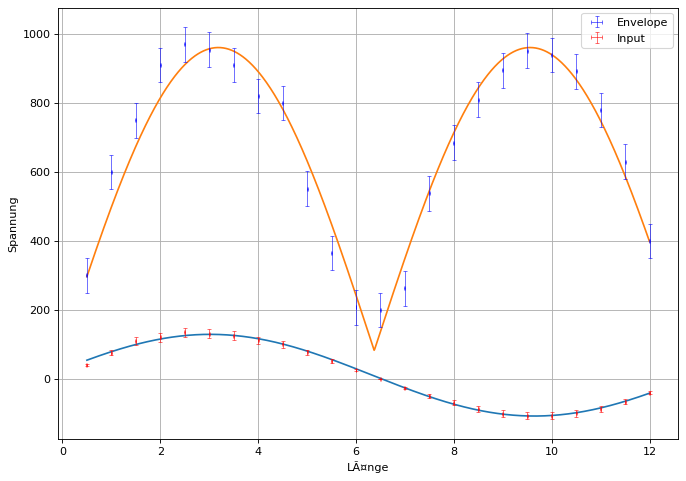

In [25]:
figure(figsize=(10,7), dpi=80)

Alen = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=0)
uenv = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=1)
duenv = [50]*len(uenv)
ui = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=2)
dui = abs(ui*0.1)

x=Alen
dx=[0.01]*len(Alen)

y1=uenv
dy1=duenv

y2=ui-0.022
dy2=dui

#def f(x,m,n):
#    return m*np.sin(n*x)

def g(x,m,n,a):
    return a+m*np.abs(np.sin(n*x))

def f(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi) + C

# --- fit ---
popt, pcov = curve_fit(
    f,
    x,
    y2,
    p0=[abs(np.max(y2)+np.min(y2))/2,  # amplitude guess
        .5,                  # frequency guess
        0.0,                  # phase guess
        np.mean(y2)],          # offset guess
)

perr = np.sqrt(np.diag(pcov))

# --- plot ---
xplot = np.linspace(min(x), max(x), 1000)

#popt, pcov=curve_fit(f,x,y2,p0=[abs(np.max(y2)-np.min(y2))/2,-0.8],sigma=dy2,absolute_sigma=True)
#perr=np.sqrt(np.diag(pcov))
plt.plot(xplot,f(xplot, *popt))

print(*popt,perr)
#print(chisquare(xplot,f_exp=f(xplot,*popt)))
#########################
# compute residuals
residuals = y2 - f(x, *popt)

# use your measurement errors if you have them (dy)
# if not: assume dy = 1
#dy = dy2     # <-- use your actual uncertainties here

# chi-square
chi2 = np.sum((residuals / dy2)**2)

# degrees of freedom
N = len(y2)           # number of data points
p = len(popt)        # number of fitted parameters
dof = N - p

# reduced chi-square
chi2_red = chi2 / dof
print('INPUT')
print("chi²:", chi2)
print("dof:", dof)
print("reduced chi²:", chi2_red)

#########################


popt, pcov=curve_fit(g,x,y1,p0=[1.3,0.87,3],sigma=dy1,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))
plt.plot(xplot,g(xplot,*popt))

print(*popt,perr)
#print(chisquare(x,f_exp=g(x,*popt)))


plt.errorbar(x,y1,xerr=dx,yerr=dy1, ls='none', capsize=2,elinewidth=0.5, capthick=0.5, color='blue',label='Envelope')
plt.errorbar(x,y2,xerr=dx,yerr=dy2, ls='none', capsize=2,elinewidth=0.5, capthick=0.5, color='red',label='Input')

plt.grid(which='minor')
plt.grid(which='major')
#plt.loglog()
plt.xlabel('LÃ¤nge')
plt.ylabel('Spannung')
plt.legend()

chi²: inf
dof: 20
reduced chi²: inf


/tmp/ipykernel_88203/2993233043.py:34: RuntimeWarning: divide by zero encountered in divide
  chi2 = np.sum((residuals / dy)**2)


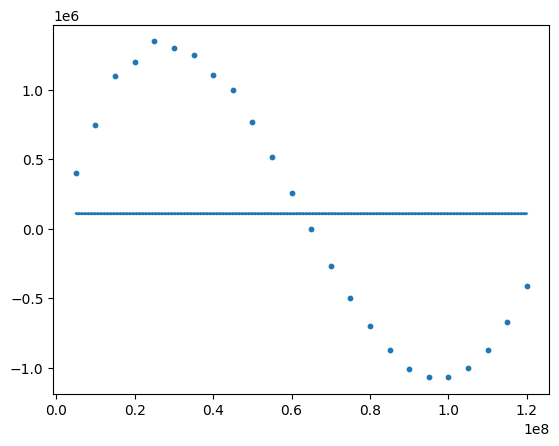

Parameters: [ 3.24257165e+03  5.00000030e-01 -3.58144412e-01  1.07727490e+05]
Errors: [2.81377056e+05 1.48110283e-06 1.03286008e+02 1.97232634e+05]


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# --- load data ---
x = Alen
y = ui

# --- sinusoid model ---
def f(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi) + C

# --- fit ---
popt, pcov = curve_fit(
    f,
    x,
    y,
    p0=[abs(np.max(y)-np.min(y))/2,  # amplitude guess
        .5,                  # frequency guess
        0.0,                  # phase guess
        np.mean(y)],          # offset guess
)

perr = np.sqrt(np.diag(pcov))

# compute residuals
residuals = y - f(x, *popt)

# use your measurement errors if you have them (dy)
# if not: assume dy = 1
dy = dy2     # <-- use your actual uncertainties here

# chi-square
chi2 = np.sum((residuals / dy)**2)

# degrees of freedom
N = len(y)           # number of data points
p = len(popt)        # number of fitted parameters
dof = N - p

# reduced chi-square
chi2_red = chi2 / dof

print("chi²:", chi2)
print("dof:", dof)
print("reduced chi²:", chi2_red)

# --- plot ---
xplot = np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, s=10)
plt.plot(xplot, f(xplot, *popt))
plt.show()

print("Parameters:", popt)
print("Errors:", perr)
